<a href="https://colab.research.google.com/github/Satan07/LGMVIP-DataScience/blob/main/ADVANCED_LEVEL_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA-SCIENCE INTERN AT LETSGROWMORE LGMVIPDECEMBER 2021**


**NAME: SATYAM PALKAR**

**ADVANCED LEVEL TASK 1 - Develop A Neural Network That Can Read Handwriting:**

In [2]:
#Import MNIST dataset from Keras
from keras.datasets import mnist
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:

#TO VISULAIZE THE DIGITS IN THE DATASET
import matplotlib.pyplot as plt
%matplotlib inline

7


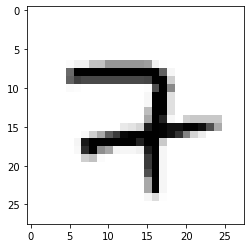

In [5]:
image_index= 38
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [6]:

#Verify the sizes of the images
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [7]:
print(y_train[:image_index +2])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6]


In [8]:
#CLEANING THE DATA
image_rows,image_cols =28,28  #image dimensions

x_train =x_train.reshape(x_train.shape[0],image_rows,image_cols,1)
x_test =x_test.reshape(x_test.shape[0], image_rows, image_cols, 1)

# normalize the image data by dividing each pixel value by 255 
x_train.astype('float32')/ 255
x_test.astype('float32')/ 255

#convert the dependent variable in the form of 
#integers to a binary class matrix. 

!pip install keras.utils 

import keras
import keras.utils
import tensorflow
from tensorflow.keras.utils import to_categorical
num_classes =10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=efd6b43fcd278a648c1339400219c8ef4ce4d62354251a208110a5e8a4a913c4
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
#DESIGNING A MODEL
#to add a concolutipn layer to take input images
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()  #creates an empty model object
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(image_rows, image_cols,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))   #to overcome the overfitting problems
model.add(layers.Flatten())       #to convert previous hidden layer in 1D array
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

**COMPILE AND TRAIN THE MODEL**

In [11]:
model.compile(loss="categorical_crossentropy", optimizer= "adam",metrics=["accuracy"])

In [12]:
batch_size =32
epochs=10
model.fit(x_train,y_train, batch_size=batch_size, epochs= epochs, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 65s 38ms/step - loss: 0.6805 - accuracy: 0.8098 - val_loss: 0.1007 - val_accuracy: 0.9717
Epoch 2/10
1688/1688 [==============================] - 61s 36ms/step - loss: 0.2141 - accuracy: 0.9399 - val_loss: 0.0675 - val_accuracy: 0.9793
Epoch 3/10
1688/1688 [==============================] - 59s 35ms/step - loss: 0.1655 - accuracy: 0.9540 - val_loss: 0.0816 - val_accuracy: 0.9780
Epoch 4/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.1439 - accuracy: 0.9602 - val_loss: 0.0665 - val_accuracy: 0.9817
Epoch 5/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.1354 - accuracy: 0.9625 - val_loss: 0.0652 - val_accuracy: 0.9833
Epoch 6/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.1251 - accuracy: 0.9666 - val_loss: 0.0675 - val_accuracy: 0.9817
Epoch 7/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.1155 - accuracy: 0.9689 - val_loss: 0.0713 -

**TESTING THE MODEL**

In [13]:

import matplotlib.pyplot as plt
import numpy as np

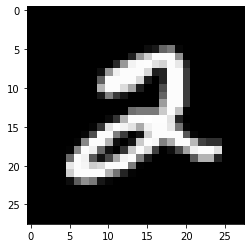

In [14]:
image = x_train[5]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

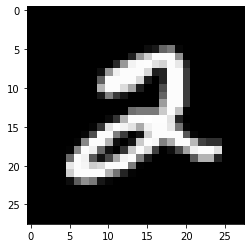

In [15]:
image = x_train[5]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [16]:
# reshape the image
image = image.reshape(-1, image_rows, image_cols, 1)

In [17]:
# predict digit
prediction =model.predict(image)
np.argmax(prediction)

2